### Background and Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

#### Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

#### Data Description

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

#### Data Dictionary
- RowNumber: Row number.
- CustomerId: Unique identification key for different customers.
- Surname: Surname of the customer
- Credit Score: A credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
- Geography: The country to which the customer belongs.
- Gender: The gender of the customer.
- Age: Age of the customer.
- Tenure: The period of time a customer has been associated with the bank.
- Balance: The account balance (the amount of money deposited in the bank account) of the customer.
- NumOfProducts: How many accounts, bank account affiliated products the person has.
- HasCrCard: Does the customer have a credit card through the bank?
- IsActiveMember: Subjective, but for the concept
- EstimatedSalary: Estimated salary of the customer.
- Exited: Did they leave the bank after all?

#### Importing Libraries

In [1]:
#importing tensorflow
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
import seaborn as sns
import keras
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')


In [3]:
# read data from csv
#mouting the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
#Defining the path of the dataset
project_path = '/content/drive/My Drive/Colab Notebooks/'
dataset_file = project_path + 'bank.csv'

In [5]:
#reading dataset
df = pd.read_csv(dataset_file)

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- Nothing out of normal here.

In [8]:
## Checking nulls
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No null values are found in our data set.

In [9]:
# Checking duplicate customers
df['CustomerId'].nunique()

10000

- CustomerID is a unique column. This is the ID/Key that bank assigned to each customer.

In [10]:
# Checking duplicate customers
df['RowNumber'].nunique()

10000

In [11]:
df.duplicated().sum()

0

No duplicates are found in the data set. We can drop rownumber as it is id column and does not provide any information.

In [12]:
df.drop('RowNumber',axis=1,inplace=True)

In [13]:
#converting customer id to type category
df['CustomerId'] = df['CustomerId'].astype('category')

In [14]:
#5 point summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


- Credit Score seems to have a normal distribution.
- Age too has a normal distribution except there are a few outliers towards the higher side. This is something that could be expected.
- Tenure has a normal distribution.
- Balance, NumOfProducts are both skewed.
- Estimated Salary too seems to have a skewed distribution.
- Most customers do seem to stay with the bank.


### EDA
#### Univariate Analysis

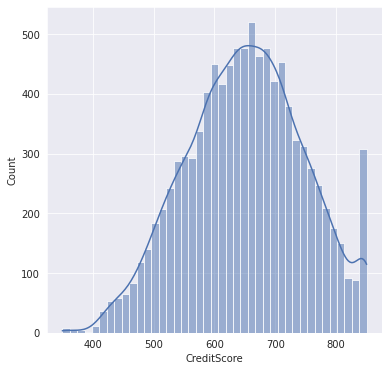

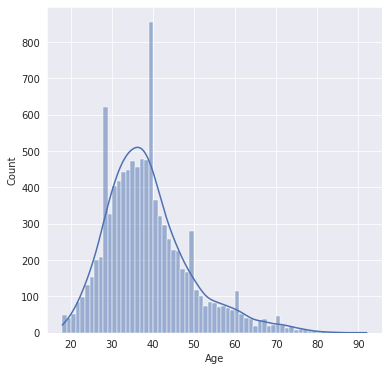

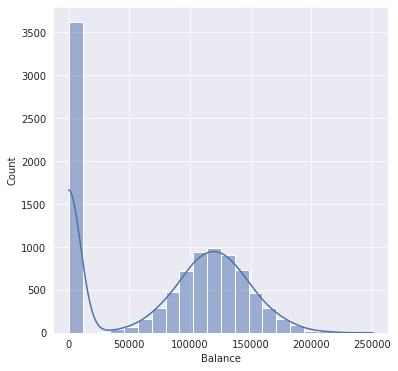

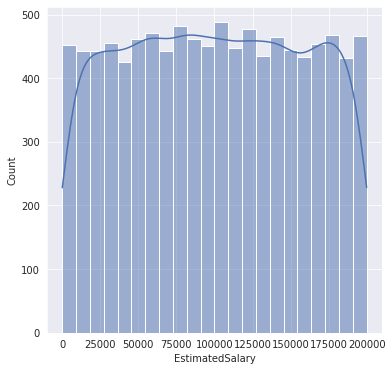

In [15]:
column_list = list(df)
column_list.remove('CustomerId')
column_list.remove('Surname')
column_list.remove('NumOfProducts')
column_list.remove('Geography')
column_list.remove('Gender')
column_list.remove('HasCrCard')
column_list.remove('IsActiveMember')
column_list.remove('Exited')
column_list.remove('Tenure')

#distplot for each attribute

sns.set({
    'figure.figsize':(6,6)
})
for i in column_list:
    sns.histplot(df[i],kde=True)
    plt.show()

- We can see Credit Score is slightly left skewed. But this could be something that is expected and indicative of real world. We also see there is jumpin number of people having highest credit score. This could be real data or error but will need to be confirmed with the business.
- Age has some skewness with most customers being i nthe age range of late 20's to early 50's
- Balance has two peaks, with most customers have close to 0 balance.
- Estimated salary is pretty evenly distributed.


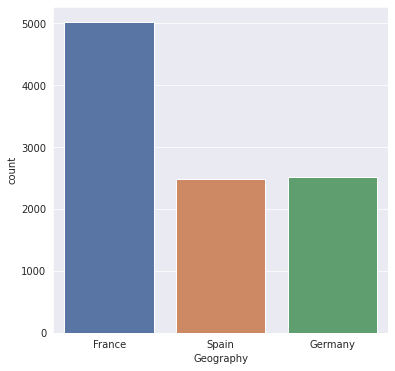

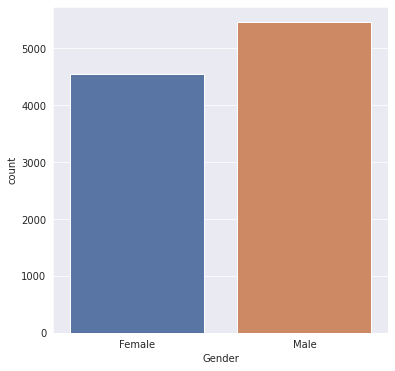

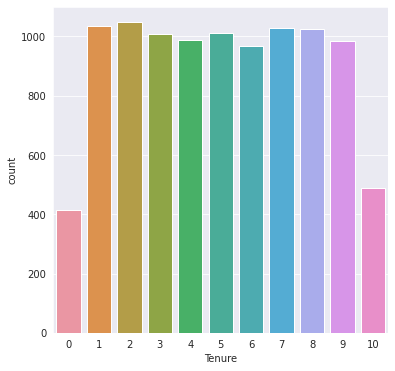

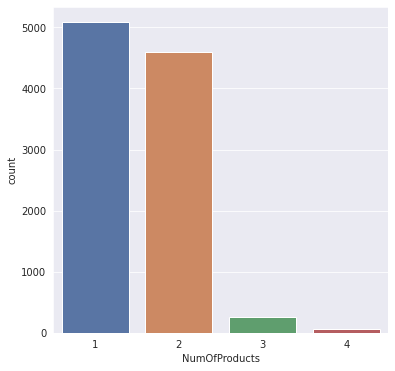

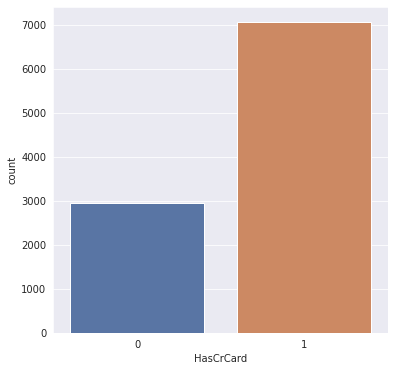

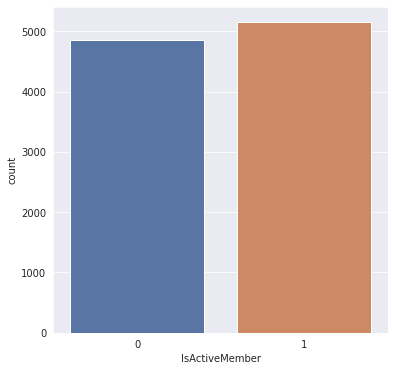

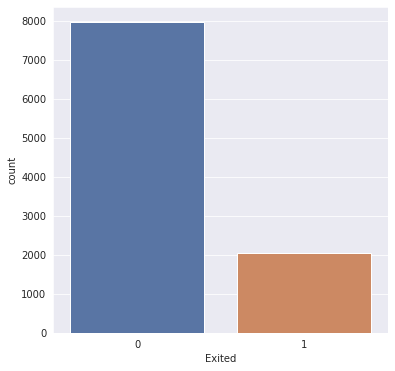

In [16]:
column_list = list(df)
column_list.remove('CustomerId')
column_list.remove('Surname')
column_list.remove('Age')
column_list.remove('Balance')
column_list.remove('EstimatedSalary')
column_list.remove('CreditScore')

#Countplot for each attribute

sns.set({
    'figure.figsize':(6,6)
})
for i in column_list:
    sns.countplot(df[i])
    plt.show()

- Most customers are from France in the dataset
- There are more number of males than females. However, the difference is not very huge.
- Most customers have been with the bank for more than 1 year.
- Most customers have only 1 or 2 products with the bank. This could indicate that bank has not been able to sell new products to existing customers.
- About 70% of customers do use banks card.
- The number of active vs inactive members are pretty much the same.
- About 20% of customers seemed to have Exited the bank. So there is imbalance in our data set. When training models we may want to look into using class weights and/ oversampling.

### Bivariate Analysis

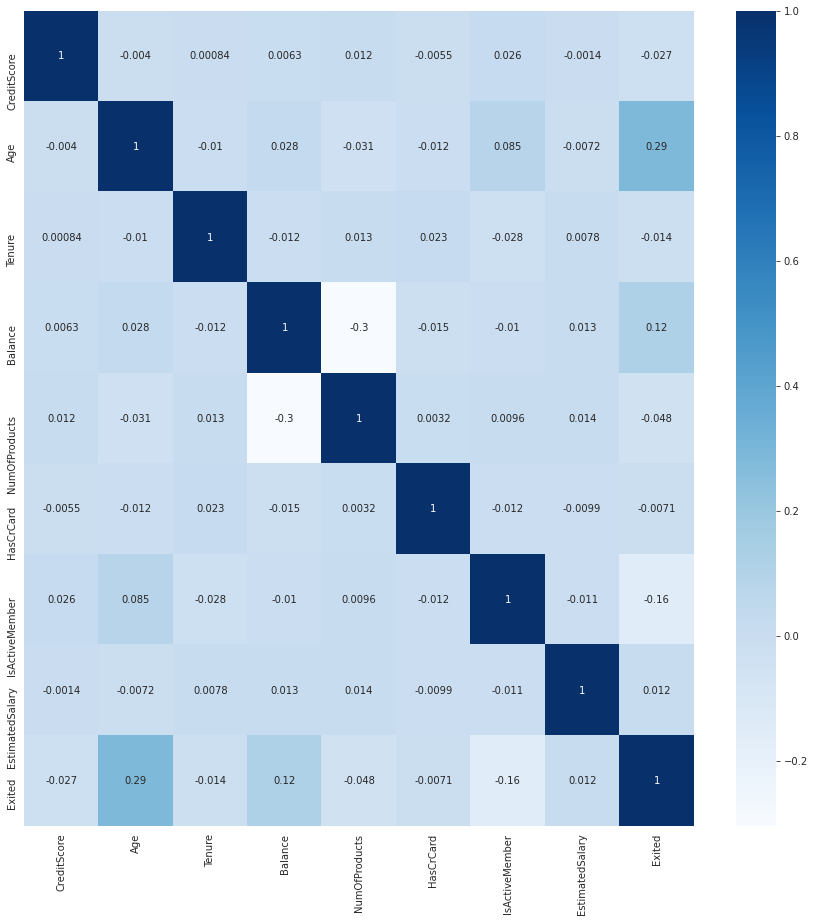

In [17]:
### plotting heat map
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),cmap="Blues",ax=ax,annot=True)

- None of the attributes seem to have a strong co-relation with any other attribute.
- Age does seem to have slight positve co-relation with Exited however this is not very strong relation.

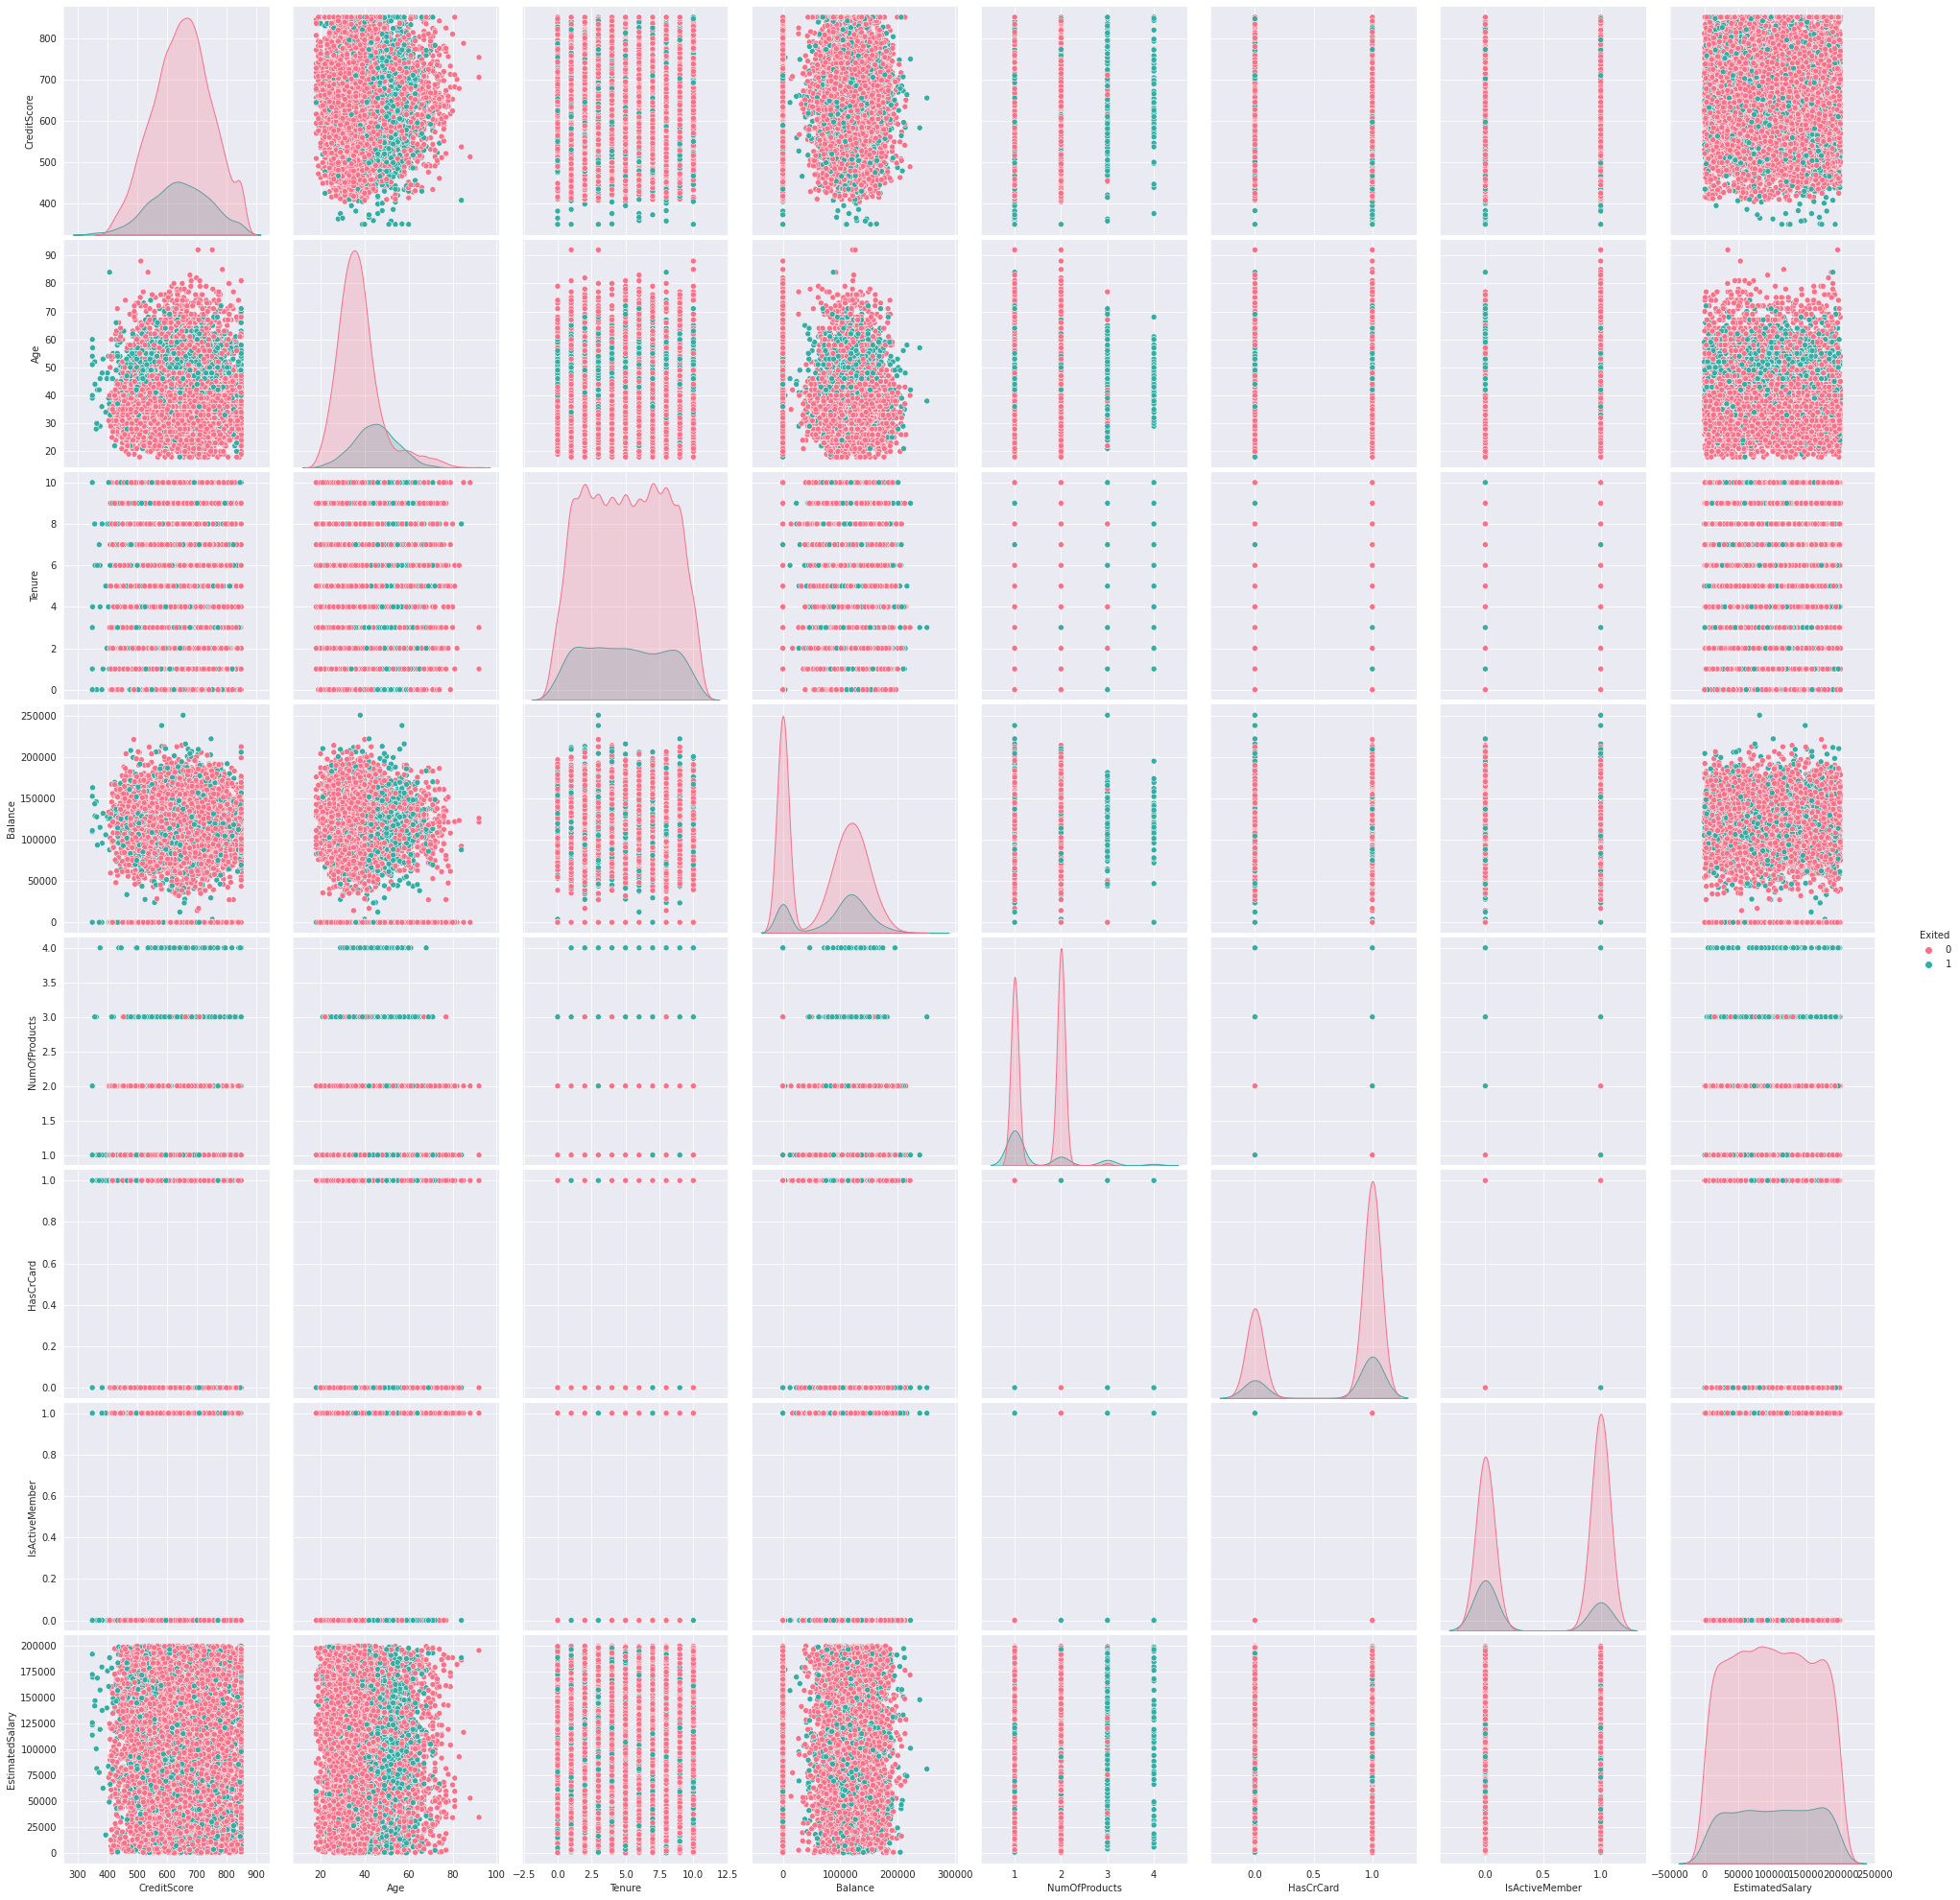

In [18]:
### plotting pair plot
sns.pairplot(df,hue = 'Exited',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

- While the exited customers seem to be pretty scattered for most attributes, we can see customer with more number of product i.e. 3 & 4 have seem to exited quite significanlty than others.
- Perhaps bank needs to look into customer service for customers with multiple relationship with the bank.

### Data Pre-Processing

In [19]:
df.dtypes

CustomerId         category
Surname              object
CreditScore           int64
Geography            object
Gender               object
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
dtype: object

In [20]:
## dropping CustomerID as it is unique for each customer and does not provide any information.
df.drop('CustomerId',axis=1,inplace=True)

In [21]:
df['Surname'].nunique()

2932

In [22]:
## dropping Surnames as well, as creating dummies for it would result in too many columns.
df.drop('Surname',axis=1,inplace=True)

In [23]:
#creating dummy variables for the categorical features
df_org=df
df = pd.get_dummies(df,drop_first=True)
df = df.astype('float32') # we will need to convert the dataset to float in order to be able to convert it into tensors later.
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.000000,1.0,1.0,1.0,101348.882812,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.859375,1.0,0.0,1.0,112542.578125,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.796875,3.0,1.0,0.0,113931.570312,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.000000,2.0,0.0,0.0,93826.632812,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.820312,1.0,1.0,1.0,79084.101562,0.0,0.0,1.0,0.0


In [24]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.000000,1.0,1.0,1.0,101348.882812,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.859375,1.0,0.0,1.0,112542.578125,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.796875,3.0,1.0,0.0,113931.570312,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.000000,2.0,0.0,0.0,93826.632812,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.820312,1.0,1.0,1.0,79084.101562,0.0,0.0,1.0,0.0


In [25]:
#create x and y variables

X = df.drop('Exited', axis=1)
y = df['Exited']

In [26]:
#Splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
#Splitting the train set into  dev set and training set
##X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1)

In [27]:
# applying standardization function.
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler()

#fitting the transform on test and train separately
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
#X_val = scaler.fit_transform(X_val)


In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


- We have 11 columns and 8000 records for our training set.

In [29]:
## creating function for confusion matrix
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

### Model Evaluation Criteria
- We need the model to accurately predict if the customer is likely to Exit. 
- The choice of evaluation metric for this business problem is Recall.
- Since, bank wants to retain more customers, we need to acurrately predict if a customer will leave or no.


## Creating Model

In [30]:
#initialize the model
model = Sequential()

In [31]:
## adding layers
model.add(Dense(units=24, input_dim = 11,activation='relu'))   # input of 11 columns as shown above
# hidden layer
model.add(Dense(units=65,activation='relu'))
#Adding Dropout to prevent overfitting 
model.add(Dropout(0.5))
model.add(Dense(65,activation='relu'))
model.add(Dense(65,activation='relu'))
# We use the sigmoid because we want probability outcomes
model.add(Dense(1,activation='sigmoid'))

In [32]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
## Printing Models summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                288       
_________________________________________________________________
dense_1 (Dense)              (None, 65)                1625      
_________________________________________________________________
dropout (Dropout)            (None, 65)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 65)                4290      
_________________________________________________________________
dense_3 (Dense)              (None, 65)                4290      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 66        
Total params: 10,559
Trainable params: 10,559
Non-trainable params: 0
____________________________________________________

In [34]:
#fitting the model
history=model.fit(X_train,y_train,batch_size=15,epochs=10,validation_split=0.2)

Epoch 1/10
427/427 [==============================] - 2s 3ms/step - loss: 0.4713 - accuracy: 0.7986 - val_loss: 0.4373 - val_accuracy: 0.8056
Epoch 2/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4252 - accuracy: 0.8202 - val_loss: 0.4010 - val_accuracy: 0.8300
Epoch 3/10
427/427 [==============================] - 1s 2ms/step - loss: 0.4012 - accuracy: 0.8327 - val_loss: 0.3830 - val_accuracy: 0.8425
Epoch 4/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3786 - accuracy: 0.8425 - val_loss: 0.3609 - val_accuracy: 0.8500
Epoch 5/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3630 - accuracy: 0.8497 - val_loss: 0.3567 - val_accuracy: 0.8506
Epoch 6/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3649 - accuracy: 0.8508 - val_loss: 0.3516 - val_accuracy: 0.8556
Epoch 7/10
427/427 [==============================] - 1s 2ms/step - loss: 0.3569 - accuracy: 0.8520 - val_loss: 0.3492 - val_accuracy: 0.8525
Epoch 

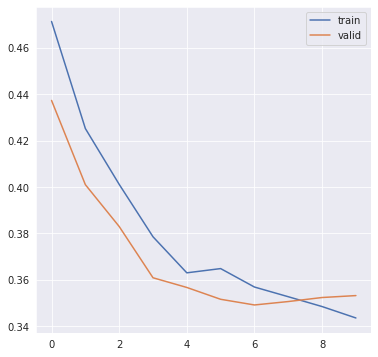

In [35]:
## Plotting Train and Test Loss
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


In [36]:
# Evaluating model
score = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3473 - accuracy: 0.8555


- The model shows a accuracy of 85% which does not seemt to that great. We will plot the confusion matrix to see if the recall is good.

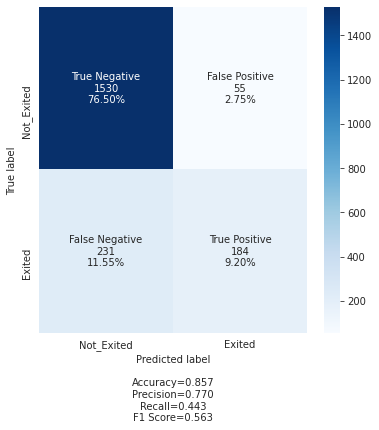

In [37]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.45:     ## using the threshold value 0.45 as it results in better recall.
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

- The metrics for this model do not look good. While it does have a good precision score, but our metric here is Recall. The model does seem to have missed out on 231 customers that were marked as Not Exited. 
- We try to improve the model performance.

In [38]:
# Training a multi-layer network with 2 hidden layers.

#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
 
                             verbose=0, mode='min', restore_best_weights= True)
Model2 = Sequential()
#Initializing the weights uisng hue_normal 
Model2.add(Dense(65, input_shape=(11,), kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(65, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model2.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
his_mod2= Model2.fit(X_train, y_train, validation_split=0.2, batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=1)


Epoch 1/40
10/10 [==============================] - 1s 22ms/step - loss: 0.7787 - accuracy: 0.7122 - val_loss: 0.4883 - val_accuracy: 0.7856
Epoch 2/40
10/10 [==============================] - 0s 7ms/step - loss: 0.6735 - accuracy: 0.7362 - val_loss: 0.4702 - val_accuracy: 0.7944
Epoch 3/40
10/10 [==============================] - 0s 6ms/step - loss: 0.6346 - accuracy: 0.7466 - val_loss: 0.4619 - val_accuracy: 0.7956
Epoch 4/40
10/10 [==============================] - 0s 7ms/step - loss: 0.5900 - accuracy: 0.7478 - val_loss: 0.4574 - val_accuracy: 0.7950
Epoch 5/40
10/10 [==============================] - 0s 7ms/step - loss: 0.5762 - accuracy: 0.7563 - val_loss: 0.4557 - val_accuracy: 0.7944
Epoch 6/40
10/10 [==============================] - 0s 7ms/step - loss: 0.5574 - accuracy: 0.7658 - val_loss: 0.4518 - val_accuracy: 0.8000
Epoch 7/40
10/10 [==============================] - 0s 7ms/step - loss: 0.5400 - accuracy: 0.7706 - val_loss: 0.4496 - val_accuracy: 0.7994
Epoch 8/40
10/10 [=

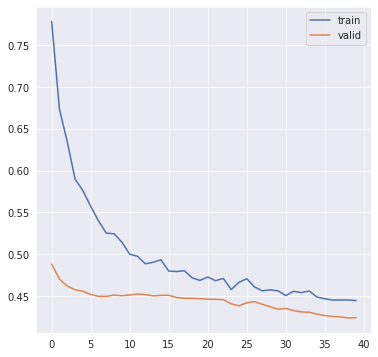

In [39]:
## Plotting train adn val loss

# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod2.history)
hist['epoch'] = his_mod2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


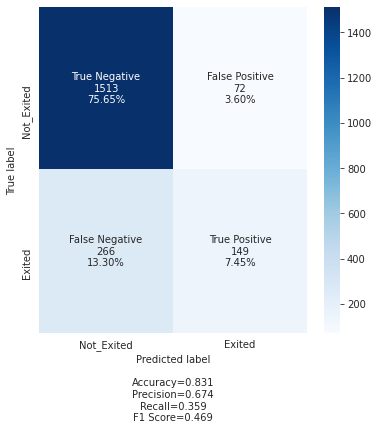

In [40]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = Model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.45:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

- The model performance is poorer than the previous model trained.
- Since we have an imbalanced data set, lets try to assign class weights and then train the model

In [41]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), np.array([y_train.iloc[i] for i in range(len(y_train))]))
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.6271558482282847, 1: 2.466091245376079}

- Class Exited(1) is assigned a weight of 2.46 vs 0.62 for not exited.

In [42]:
# Training a multi-layer network with 2 hidden layers.

#Training Multi-layer perceptron with 2 hidden layers

#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
 
                             verbose=0, mode='min', restore_best_weights= True)
Modelcw = Sequential()
#Initializing the weights uisng hue_normal 
Modelcw.add(Dense(65, input_shape=(11,), kernel_initializer='he_normal', activation='relu'))
Modelcw.add(Dropout(0.5))
Modelcw.add(Dense(65, kernel_initializer='he_normal', activation='relu'))
Modelcw.add(Dropout(0.5))
Modelcw.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Modelcw.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
his_modcw= Modelcw.fit(X_train,y_train,batch_size=25,epochs=80, class_weight=class_weights, shuffle=True, callbacks=[es], verbose=1,  validation_split=0.2)


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/80
256/256 [==============================] - 1s 3ms/step - loss: 0.9024 - accuracy: 0.5706 - val_loss: 0.6450 - val_accuracy: 0.6500
Epoch 2/80
256/256 [==============================] - 1s 2ms/step - loss: 0.7122 - accuracy: 0.5941 - val_loss: 0.6211 - val_accuracy: 0.6513
Epoch 3/80
256/256 [==============================] - 1s 2ms/step - loss: 0.6528 - accuracy: 0.6191 - val_loss: 0.5894 - val_accuracy: 0.7050
Epoch 4/80
256/256 [==============================] - 1s 2ms/step - loss: 0.6289 - accuracy: 0.6442 - val_loss: 0.5858 - val_accuracy: 0.7225
Epoch 5/80
256/256 [==============================] - 1s 2ms/step - loss: 0.6076 - accuracy: 0.6644 - val_loss: 0.5961 - val_accuracy: 0.7019
Epoch 6/80
256/256 [==============================] - 0s 2ms/step - loss: 0.5974 - accuracy: 0.6728 - val_loss: 0.5810 - val_accuracy: 0.7156
Epoch 7/80

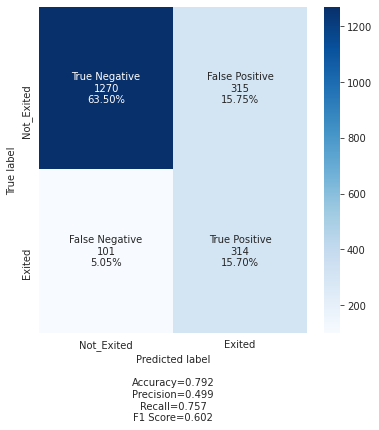

In [44]:
#plotting confusion matrix
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = Modelcw.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.45:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

- Assigning class weights did improve recall score.
- Recall score for new model trained is 75%.
- Based on the result above, we may try oversampling to see if adding more date points helps the model to learn better and give a higher recal score.

### Oversampling using SMOTE

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1622
Before UpSampling, counts of label 'No': 6378 

After UpSampling, counts of label 'Yes': 6378
After UpSampling, counts of label 'No': 6378 

After UpSampling, the shape of train_X: (12756, 11)
After UpSampling, the shape of train_y: (12756,) 



In [47]:
# Training a multi-layer network with 2 hidden layers.

#Training Multi-layer perceptron with 2 hidden layers

#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
 
                             verbose=0, mode='min', restore_best_weights= True)
ModelOS = Sequential()
#Initializing the weights uisng hue_normal 
ModelOS.add(Dense(65, input_shape=(11,), kernel_initializer='he_normal', activation='relu'))
ModelOS.add(Dropout(0.5))
ModelOS.add(Dense(65, kernel_initializer='he_normal', activation='relu'))
ModelOS.add(Dropout(0.5))
ModelOS.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

ModelOS.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
his_modOS= ModelOS.fit(X_train_over, y_train_over, validation_split=0.2, batch_size=15, epochs=40, callbacks=[es], shuffle=True, verbose=1)


Epoch 1/40
681/681 [==============================] - 2s 2ms/step - loss: 0.7387 - accuracy: 0.6288 - val_loss: 0.6741 - val_accuracy: 0.5929
Epoch 2/40
681/681 [==============================] - 1s 2ms/step - loss: 0.5931 - accuracy: 0.6913 - val_loss: 0.7216 - val_accuracy: 0.5396
Epoch 3/40
681/681 [==============================] - 1s 2ms/step - loss: 0.5666 - accuracy: 0.7142 - val_loss: 0.6935 - val_accuracy: 0.5678
Epoch 4/40
681/681 [==============================] - 1s 2ms/step - loss: 0.5473 - accuracy: 0.7293 - val_loss: 0.6910 - val_accuracy: 0.5627
Epoch 5/40
681/681 [==============================] - 1s 2ms/step - loss: 0.5298 - accuracy: 0.7368 - val_loss: 0.6690 - val_accuracy: 0.5745
Epoch 6/40
681/681 [==============================] - 1s 2ms/step - loss: 0.5171 - accuracy: 0.7479 - val_loss: 0.6846 - val_accuracy: 0.5572
Epoch 7/40
681/681 [==============================] - 1s 2ms/step - loss: 0.5040 - accuracy: 0.7585 - val_loss: 0.6594 - val_accuracy: 0.5533
Epoch 

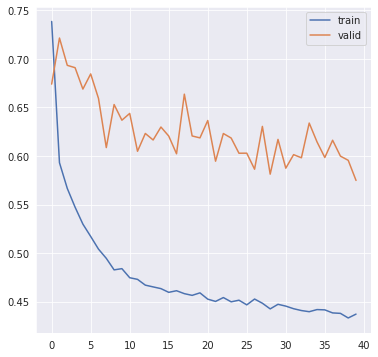

In [48]:
## Plotting train and val loss

# Capturing learning history per epoch
hist  = pd.DataFrame(his_modOS.history)
hist['epoch'] = his_modOS.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


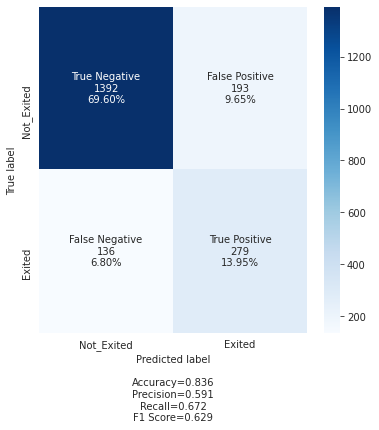

In [49]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = ModelOS.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.45:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

- From the above we can see, oversampling did not provide much benefit in terms of improving the recall score. 

### Under Sampling

In [50]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [51]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1622
Before Under Sampling, counts of label 'No': 6378 

After Under Sampling, counts of label 'Yes': 1622
After Under Sampling, counts of label 'No': 1622 

After Under Sampling, the shape of train_X: (3244, 11)
After Under Sampling, the shape of train_y: (3244,) 



In [52]:
# Training a multi-layer network with 2 hidden layers.

#Training Multi-layer perceptron with 2 hidden layers

#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
 
                             verbose=0, mode='min', restore_best_weights= True)
ModelUS = Sequential()
#Initializing the weights uisng hue_normal 
ModelUS.add(Dense(65, input_shape=(11,), kernel_initializer='he_normal', activation='relu'))
ModelUS.add(Dropout(0.5))
ModelUS.add(Dense(65, kernel_initializer='he_normal', activation='relu'))
ModelUS.add(Dropout(0.5))
ModelUS.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

ModelUS.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
his_modUS= ModelUS.fit(X_train_over, y_train_over, validation_split=0.2, batch_size=15, epochs=40, callbacks=[es], shuffle=True, verbose=1)


Epoch 1/40
681/681 [==============================] - 2s 2ms/step - loss: 0.7566 - accuracy: 0.6286 - val_loss: 0.7725 - val_accuracy: 0.4491
Epoch 2/40
681/681 [==============================] - 1s 2ms/step - loss: 0.5985 - accuracy: 0.6782 - val_loss: 0.7036 - val_accuracy: 0.5568
Epoch 3/40
681/681 [==============================] - 1s 2ms/step - loss: 0.5634 - accuracy: 0.7131 - val_loss: 0.7398 - val_accuracy: 0.5317
Epoch 4/40
681/681 [==============================] - 1s 2ms/step - loss: 0.5429 - accuracy: 0.7312 - val_loss: 0.6927 - val_accuracy: 0.5764
Epoch 5/40
681/681 [==============================] - 1s 2ms/step - loss: 0.5286 - accuracy: 0.7385 - val_loss: 0.6645 - val_accuracy: 0.5776
Epoch 6/40
681/681 [==============================] - 1s 2ms/step - loss: 0.5170 - accuracy: 0.7529 - val_loss: 0.6704 - val_accuracy: 0.5658
Epoch 7/40
681/681 [==============================] - 1s 2ms/step - loss: 0.5038 - accuracy: 0.7585 - val_loss: 0.6327 - val_accuracy: 0.5972
Epoch 

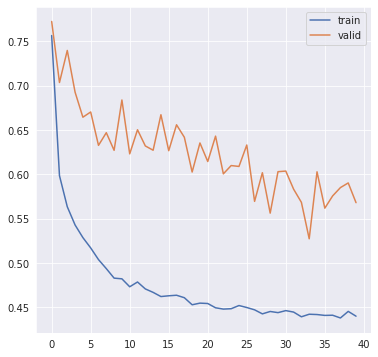

In [53]:
## Plotting train and val loss

# Capturing learning history per epoch
hist  = pd.DataFrame(his_modUS.history)
hist['epoch'] = his_modUS.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


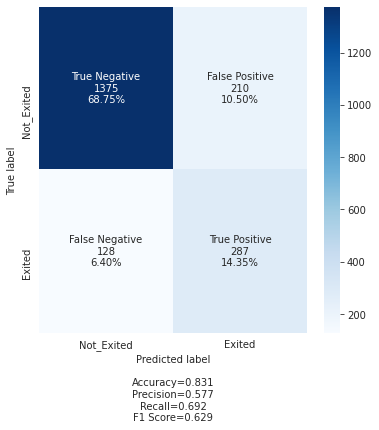

In [54]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = ModelUS.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.45:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

- Even Under sampling does not help much with the model performance.
- Let us try to build a model using XGBoost and see if we can achieve better score.

In [55]:
from xgboost import XGBClassifier
xgb_classifier=XGBClassifier(random_state=1,eval_metric='error')
xgb_classifier = xgb_classifier.fit(X_train,y_train)

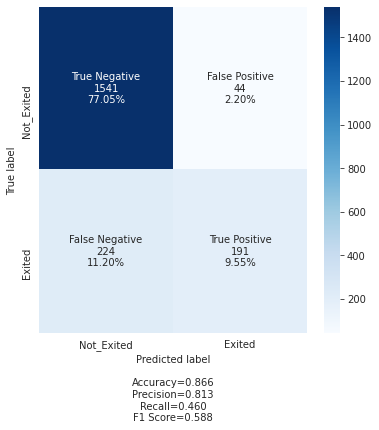

In [56]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = xgb_classifier.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.45:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

- XGBoost seems to have returned a better precision score.
- Lets try to tune it to improve recall.

In [57]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split
# tuning XG Boost 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='error')

# Grid of parameters to choose from
parameters = {'n_estimators': [140,145,150], 
              'subsample':[0.5,0.6],
              'colsample_bytree':[0.6,0.8],
              'colsample_bylevel':[0.7, 0.8, 0.9, 1]
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
xgb_tuned = xgb_tuned.fit(X_train, y_train)

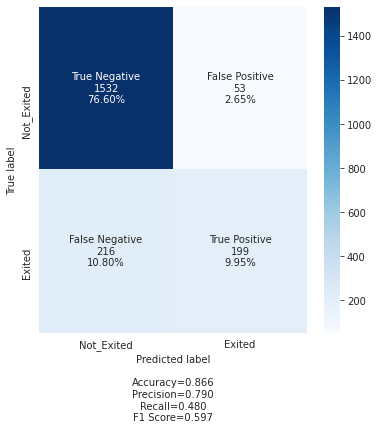

In [58]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = xgb_tuned.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.45:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

#### Model Performance Evaluation
- Using the confusion metrics and model scores we observe model with Class Weights assigne does best and achieves 75% recall.
- By Adjusting the Threshold for predicted values to 0.45 we see Recall does improve. Although this is at the cost of F1Score. However, the decrease in F1 score is not huge.
- Additional Hyper parameter tuning can also be performed to improve model performance.

We can select ModelCW based on our analysis above.


### Conclusion

- Amongst all the models trained, the Model with Class weight assignments seem to have done the best. 
- The model with Class Weights assinged provides a good Recall score of 75%. We can use this model to predict the customer behaviors.
- Bank can use this model to predict the customers behaviors and can target marketing and offer other service improvements.
- Bank can assess what types of services do customers with 3 or more relationships/products use. Efforts can be made to improve these services.
- Additionally, Bank can look into improvement to increase customer relationship by offering additional services.
